# KNeighborsClassifier with scikit learn

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Code
```python
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(<parameters>)
model.fit(X, y)
y_new = model.predict(X_test)
```

[Official Reference](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

## Parameters
- `n_neighbors`: Numbers of neighbors (including self) to vote
- `algorithm`: `'auto'`, `'ball_tree'`, `'kd_tree'`, or `'brute'`  
it only affect the speed but not the outcome. 

## Attributes
- `classes_`: an array of shape `(n_classes,)`  
(Usually `0, ..., n_classes-1`)

## Sample data

##### Exercise 1
Let  
```python
mu1 = np.array([2.5,0])
cov1 = np.array([[1.1,-1],
                [-1,1.1]])
mu2 = np.array([-2.5,0])
cov2 = np.array([[1.1,1],
                [1,1.1]])
X = np.vstack([np.random.multivariate_normal(mu1, cov1, 100), 
               np.random.multivariate_normal(mu2, cov2, 100)])
y = np.array([0]*100 + [1]*100)
```

###### 1(a)
Plot the points (rows) in `X` with `c=y` .  

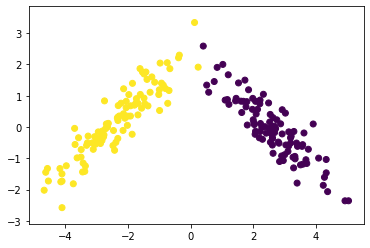

In [2]:
### your answer here
mu1 = np.array([2.5,0])
cov1 = np.array([[1.1,-1],
                [-1,1.1]])
mu2 = np.array([-2.5,0])
cov2 = np.array([[1.1,1],
                [1,1.1]])
X = np.vstack([np.random.multivariate_normal(mu1, cov1, 100), 
               np.random.multivariate_normal(mu2, cov2, 100)])
y = np.array([0]*100 + [1]*100)
plt.axis('equal')
plt.scatter(*X.T, c=y)

###### 1(b)
Use `np.random.rand` to make 1000 random points in the region $-5\leq x\leq 5$, $-5\leq y\leq 5$.  
Make a prediction of them and plot them upon your previous figure.

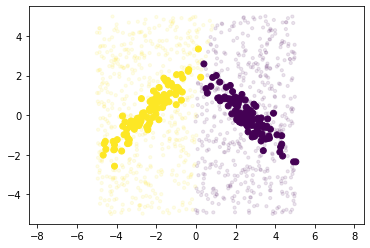

In [3]:
### your answer here
X_test = np.random.rand(1000, 2) * 10 - np.array([5,5])
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X, y)
y_new = model.predict(X_test)
plt.axis('equal')
plt.scatter(*X_test.T, c=y_new, s=10, alpha=0.1)
plt.scatter(*X.T, c=y)

##### Exercise 2
Let  
```python
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
```

###### 2(a)
Use `X` and `y` to train a $k$-nearest neighbors classification model with `n_neighbors=5` .  
Let `y_new` be the prediction.  
Calculate the accuracy score between `y` and `y_new` ,  
that is, the number of correct answers divided by the number of samples.

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)
y_new = model.predict(X)

score = np.sum(y==y_new)/y.shape[0]
print('score =',score)


score = 0.9666666666666667


###### 2(b)
Let  
```python
from sklearn.metrics import accuracy_score
accuracy_score(y_new, y)
```
Check if the output is the same as your previous answer.

In [5]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_new,y)
if acc == score:
  print('the answer is the same.')
else:
  print('the answer is not the same but it should.')  


the answer is the same.


###### 2(c)
Change the model to the setting `n_neighbors=1` .  
Does the accuracy increase or decrease?  Why?

In [6]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_new = model.predict(X)

score = np.sum(y==y_new)/y.shape[0]
print('score =',score)
print('the accuracy increases since the accuracy is 100% when there is only one neighbor to observe (the point itself).')

score = 1.0
the accuracy increases since the accuracy is 100% when there is only one neighbor to observe (the point itself).


##### Exercise 3
Let  
```python
from sklearn.datasets import load_digits
digits = load_digits()
mask = (digits.target == 0) | (digits.target == 1)
X = digits.data[mask]
y = digits.target[mask]
```

###### 3(a)
Train a $k$-nearest neighbors classification model.  
How is its accuracy score?

In [7]:
### your answer here
from sklearn.datasets import load_digits
digits = load_digits()
mask = (digits.target == 0) | (digits.target == 1)
X = digits.data[mask]
y = digits.target[mask]

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)
y_new = model.predict(X)
accuracy_score(y_new, y)

1.0

###### 3(b)
Use any software or online app to draw a picture of 0 or 1.  
Save it as a file, e.g., `my_digit.png` .  
Use the following code to load it.  
```python
from PIL import Image
img = Image.open("my_digit.png").resize(8,8).convert('L')
arr = 255 - np.array(img) / 16
```
Does the model give you the right answer?  
Each of you can do 5 pictures.  
Let's see what is the accuracy score.

In [11]:
import os 
path = "." #update here

from PIL import Image
img = []
for i in range(1,21):
    filename = os.path.join(path, "img_"+str(i)+".png") 
    img.append(Image.open(filename).resize((8,8)).convert('L')) 

X_test = (255-np.vstack([np.array(image).ravel() for image in img]))/16 
ans = np.array([1,0,0,1,1,1,0,0,0,1,1,0,1,0,1,0,0,0,1,1]) 

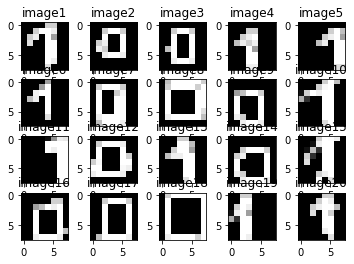

In [12]:
for i in range(20): 
    plt.subplot(4,5,i+1) 
    plt.title('image'+str(i+1))
    plt.imshow(X_test[i].reshape(8,8),cmap='gray')
plt.show()

In [14]:
y_new = model.predict(X_test)
score = np.sum(ans==y_new)/ans.shape[0]
print('score =',score) 
print(y_new) 

score = 0.95
[1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1]


## Experiments

##### Exercise 4
For a supervised learning model, you have to partition your data into a training set and a testing set.  
You may do it easily by  
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
```

###### 4(a)
Split the data in Exercise 2.  
Use the training set to train the model.  
Apply the trained model to the testing set.  
How is the accuracy?  
Run it several time and get an average.

In [15]:
### your answer here
from sklearn.model_selection import train_test_split

def multiple_accuracy_test(X,y,n=10,ret_model=False):
  r = []
  for i in range(n):
    model = KNeighborsClassifier()
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r.append(accuracy_score(y_test,y_pred))
  res = sum(r)/len(r)
  if  ret_model:
    res = (res,model)
  return res


print("Accuracy score:",multiple_accuracy_test(iris.data,iris.target))

Accuracy score: 0.9631578947368421


###### 4(b)
Split the data in Exercise 3.  
Use the training set to train the model.  
Apply the trained model to the testing set.  
How is the accuracy?  
Run it several time and get an average.

In [16]:
### your answer here
print("Accuracy score:",multiple_accuracy_test(digits.data,digits.target))

Accuracy score: 0.984


##### Exercise 5
Let  
```python 
X = 5 * np.random.randn(1000,2)
lengths = np.linalg.norm(X, axis=1)
band1 = (lengths > 1) & (lengths <2)  
band2 = (lengths > 3) & (lengths <4)
X = np.vstack([X[band1], X[band2]])
y = np.array([0]*band1.sum() + [1]*band2.sum())
```

###### 5(a)
Go through the split-train-test process.  
What is the accuracy score?

In [17]:
### your answer here
X = 5 * np.random.randn(1000,2)
lengths = np.linalg.norm(X, axis=1)
band1 = (lengths > 1) & (lengths <2)  
band2 = (lengths > 3) & (lengths <4)
X = np.vstack([X[band1], X[band2]])
y = np.array([0]*band1.sum() + [1]*band2.sum())
score, model = multiple_accuracy_test(X,y,1,True)
print("Accuracy score:",score)

Accuracy score: 1.0


###### 5(b)
Use some random points to plot the regions for each class.  
(Just as what we did in Exercise 1.)

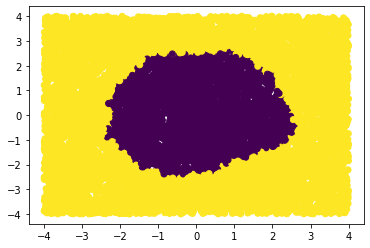

In [18]:
### your answer here
data = np.random.rand(10000,2)*8 - 4
y_data = model.predict(data)
plt.scatter(*X.T,c=y)
plt.scatter(*data.T,c=y_data)